In [1]:
from tensorflow.keras.models import load_model

In [2]:
model_v2 = load_model(r'C:\Users\navan\Desktop\face_exp\face_exp_mobilenetv2.h5')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_path=r"C:\Users\navan\Desktop\images\train"
test_path=r"C:\Users\navan\Desktop\images\validation"

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  rotation_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True)

In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 25180 images belonging to 5 classes.


In [11]:
test_set=test_datagen.flow_from_directory(
                                          test_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical',
                                          shuffle=True
)

Found 6158 images belonging to 5 classes.


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
checkpoint=ModelCheckpoint('C:\\Users\\navan\\Desktop\\face_exp\\face_exp_mobilenetv2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)

In [ ]:
 history = model_v2.fit(x=train_set,
                   validation_data=train_set,
                   epochs=30,
                   callbacks=[checkpoint],
                   steps_per_epoch=len(train_set),
                   validation_steps=len(test_set))

In [16]:
import matplotlib.pyplot as plt

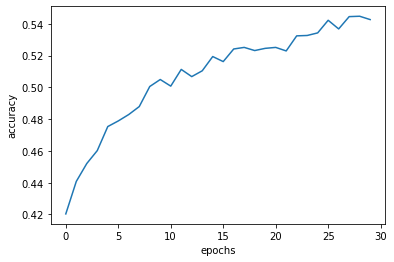

In [21]:
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.plot(history.history['accuracy'])

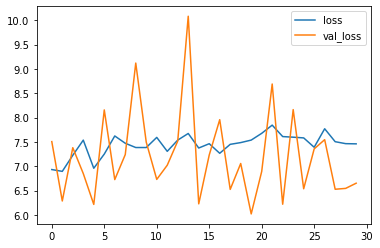

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])